<a href="https://colab.research.google.com/github/UmaEdiga04/DL-lab/blob/main/train_the_model_with_embedding_and_simple_RNN_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=3, input_shape=(12, 1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

trainX = np.random.rand(100, 12, 1)
trainY = np.random.rand(100, 1)

model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 - 2s - 20ms/step - loss: 0.6769
Epoch 2/10
100/100 - 0s - 3ms/step - loss: 0.1146
Epoch 3/10
100/100 - 0s - 4ms/step - loss: 0.1092
Epoch 4/10
100/100 - 0s - 3ms/step - loss: 0.1083
Epoch 5/10
100/100 - 0s - 3ms/step - loss: 0.1066
Epoch 6/10
100/100 - 0s - 3ms/step - loss: 0.1047
Epoch 7/10
100/100 - 0s - 3ms/step - loss: 0.1042
Epoch 8/10
100/100 - 0s - 3ms/step - loss: 0.1024
Epoch 9/10
100/100 - 0s - 3ms/step - loss: 0.1020
Epoch 10/10
100/100 - 0s - 3ms/step - loss: 0.1017


In [6]:
from keras.layers import SimpleRNN

rnn_layer = SimpleRNN(units=128, input_shape=(10, 1))
from keras.layers import LSTM

lstm_layer = LSTM(units=128, input_shape=(10, 1))
from keras.layers import GRU

gru_layer = GRU(units=128, input_shape=(10, 1))

In [9]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Convert the labels to binary (positive/negative)
y_train = np.array([1 if label > 5 else 0 for label in y_train])
y_test = np.array([1 if label > 5 else 0 for label in y_test])

# Pad the sequences to have a maximum length of 500
max_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

# Convert the data to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 500)
Testing data shape: (25000, 500)
Training labels shape: (25000,)
Testing labels shape: (25000,)


In [11]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(SimpleRNN(units=128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.3f}')

Epoch 1/5
 11/782 ━━━━━━━━━━━━━━━━━━━━ 3:46 293ms/step - accuracy: 0.8713 - loss: 0.3689

KeyboardInterrupt: 

[array([0.99993841]), array([0.99995526]), array([0.99994992]), array([0.99994753]), array([0.99995277]), array([0.99981063]), array([0.99995543]), array([0.99995947]), array([0.99994963]), array([0.99995742])]
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 222s 281ms/step - accuracy: 0.5351 - loss: 0.6887 - val_accuracy: 0.6068 - val_loss: 0.6482
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 220s 281ms/step - accuracy: 0.6771 - loss: 0.6026 - val_accuracy: 0.6466 - val_loss: 0.6145
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 260s 278ms/step - accuracy: 0.7323 - loss: 0.5351 - val_accuracy: 0.6681 - val_loss: 0.6753
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 219s 280ms/step - accuracy: 0.7962 - loss: 0.4440 - val_accuracy: 0.7499 - val_loss: 0.5351
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 260s 278ms/step - accuracy: 0.8079 - loss: 0.4221 - val_accuracy: 0.7220 - val_loss: 0.5997
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 261s 276ms/step - accuracy: 0.8079 - loss: 0.4261 - val_accuracy: 0.6159 - val_loss: 0.66

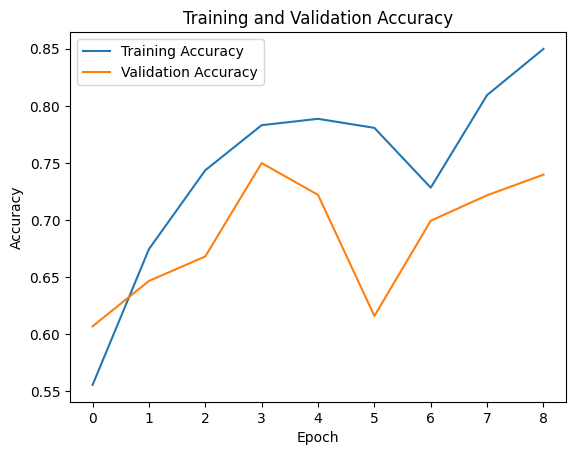

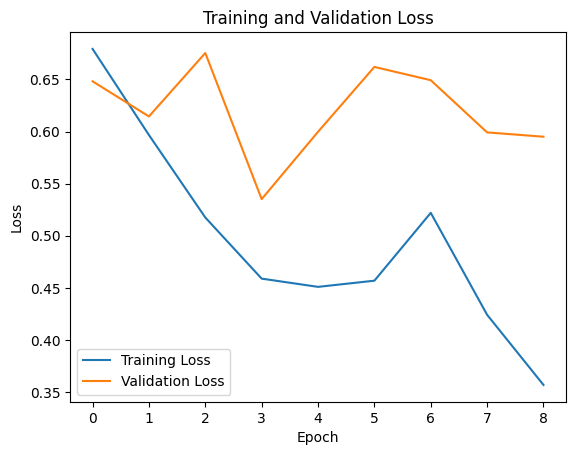

In [13]:
import numpy as np

n_inputs = 10
n_hidden = 20
n_outputs = 1

weights = np.random.rand(n_inputs, n_hidden)
biases = np.zeros((n_hidden,))

output_weights = np.random.rand(n_hidden, n_outputs)
output_biases = np.zeros((n_outputs,))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def rnn_layer(inputs, weights, biases):
    hidden_state = np.zeros((n_hidden,))
    outputs = []
    for t in range(len(inputs)):
        hidden_state = tanh(np.dot(inputs[t], weights) + biases)
        outputs.append(hidden_state)
    return outputs

def output_layer(hidden_states, output_weights, output_biases):
    outputs = []
    for t in range(len(hidden_states)):
        output = sigmoid(np.dot(hidden_states[t], output_weights) + output_biases)
        outputs.append(output)
    return outputs

inputs = np.random.rand(10, n_inputs)
hidden_states = rnn_layer(inputs, weights, biases)
outputs = output_layer(hidden_states, output_weights, output_biases)
print(outputs)
from keras.layers import SimpleRNN

rnn_layer = SimpleRNN(units=20, input_shape=(10, 10))
from keras.datasets import imdb
from keras.preprocessing import sequence

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

max_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(SimpleRNN(units=128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()